# 常用数据集导入

来源：
- sklearn
   - 鸢尾花数据集 iris
- 网络
   - 出生体重数据 Birth weight data
   - 波士顿房价数据（Boston Housing data）
   - MNIST
   - CIFAR-10
   
##### 网络数据平台
    1. Kaggle
    2. 数据堂
    3. UCI机器学习库  [UCI](http://archive.ics.uci.edu/ml/index.php/)
    4. Amazon [Amazon 数据集](https://registry.opendata.aws/)
    5. Awesome [Awesome 公开数据集]:https://github.com/awesomedata/awesome-public-datasets
参考文章

   [机器学习常用数据集](https://blog.csdn.net/weixin_38632246/article/details/86703642)

### 学习内容
    1. 学习数据集的导入，使用方法
    2. 了解这些数据集分别对应的是ML的哪个领域
    3. 学习如何从网络中抓取现成的dataset


数据集名|数据描述|数据记录数|数据用途|下载地址
-|-|-|-|-
Iris|鸢尾花卉数据集|150|分类和聚类|http://archive.ics.uci.edu/ml/datasets/Iris
Adult|美国人口普查数据|48842|分类和聚类|http://archive.ics.uci.edu/ml/datasets/Adult
Wine|葡萄酒数据|178|分类和聚类|http://archive.ics.uci.edu/ml/datasets/Wine
20 Newsgroups|新闻数据集|19997|文本分类和聚类|http://qwone.com/~jason/20Newsgroups/
MovieLens|电影评分的数据集|26000000|推荐系统|https://grouplens.org/datasets/movielens/
MNIST|手写字识别数据集|70000|手写字识别|http://yann.lecun.com/exdb/mnist/

## 代码上手

### iris 鸢尾花数据集

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
print(len(iris.data))
print(iris.data.shape) # 150个样本 4个维度
print(iris.target) # 3类花

150
(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

说明：
- data 输入
- target 标签   

#### 做一个KNN分类
k近邻算法的一般流程

- 收集数据：可以使用任何方法。
- 准备数据：距离计算所需要的数值，最好是结构化的数据格式。
- 分析数据：可以使用任何方法。
- 训练算法：此步骤不适用于k近邻算法。
- 测试算法：计算错误率。
- 使用算法：首先需要输入样本数据和结构化的输出结果，然后运行k近邻算法判定输入数据分别属于哪个分类，最后应用对计算出的分类执行后续的处理。


Text(0.5, 1.0, '散点图')

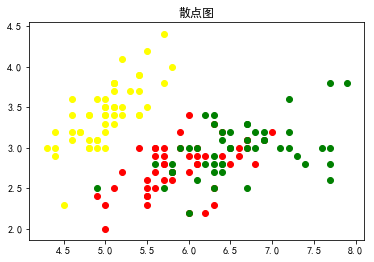

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
x = iris.data
y = iris.target

# 绘制前两维的散点图
plt.scatter(x[y==1,0],x[y==1,1],color = 'red')
plt.scatter(x[y==2,0],x[y==2,1],color = 'green')
plt.scatter(x[y==0,0],x[y==0,1],color = 'yellow')
plt.title('散点图')



In [16]:
# 做KNN
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split #数据分割模块 CV 改版！！ model_selection

# 数据分割
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3)


knn = KNeighborsClassifier() #声明
knn.fit(X_train,Y_train) #训练

y_test_predict = knn.predict(X_test)

acc = len(y_test_predict == Y_test)/len(y_test_predict)
print('The accuracy is %.2f %%' %(acc*100))
# print(y_test_predict)

The accuracy is 100.00 %


### 波士顿房价数据

来源
> https://archive.ics.uci.edu/ml/machine-learningdatabases/housing/housing.data

获取网络请求

 ```
 import requests
 
 file = request.get(url)
 ```
对dat文件(字符串文件)进行处理，转变为python数组

涉及的内容

- split分割字符串
- 将名称数据变为数字
- 装入pandas
 

In [116]:
import requests
import os
import pandas as pd
import csv
# 波士顿房价数据集找不不到，用adult数据集代替(来源与UCI)
train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
file = requests.get(train_url)


print(len(file.text))

3974305


In [113]:
# 分割data
data = []
res = file.text.split('\n')
for i in res:
    coll = i.split(', ')
    if coll:
        data.append(coll)


# pandas数据
data = pd.DataFrame(data)

# 类型转换
for i in range(data.shape[-1]):
    if data[i][0].isnumeric():
        pd.to_numeric(data[i])
    elif type(data[i][0]) == type(''):
        pass
    
# 维持一个映射（名称--编号）
data_types = data.dtypes
print(data_types)


0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
dtype: object
